# VIB: Theory

**Notation**
* $x$ be our input source,
* $y$ be our target
* $z$ be our latent representation

### Mutual Information
Mutual information (MI) measures the amount of information obtained about one random variable after observing another random variable. Formally given two random variables $x$ and $y$ with joint distribution $p(x,y)$ and marginal densities $p(x)$ and $p(y)$ their MI is defined as the KL-divergence between the joint density and the product of their marginal densities
$$\begin{align}
I(x;y)&=I(y;x)\\
&=KL\Big(p(x,y)||p(x)p(y)\Big)\\
&=\mathbb{E}_{(x,y)\sim p(x,y)}\bigg[\log\frac{p(x,y)}{p(x)p(y)}\bigg]\\
&=\int dxdyp(x,y)\log\frac{p(x,y)}{p(x)p(y)}
\end{align}$$

### Information Bottlenecks
IB regards supervised learning as a representation learning problem, seeking a stochastic map from input data
$x$ to some latent representation $z$ that can still be used to predict the labels $y$ , under a constraint on its total complexity.

We assume our joint distribution $p(x,y,z)$ can be factorised as follows:
$$p(x,y,z)=p(z\mid x,y)p(y\mid x)p(x)=p(z\mid x)p(y\mid x)p(x)$$
which corresponds to the following Markov Chain 
$$y\rightarrow x\rightarrow z$$

Our goal is to learn an encoding that is maximally informative about our target $y$ measured by $I(y;z)$. We could always ensure a maximally informative representation by taking the identity encoding $x=z$ which is not useful. Instead we apply a constraint such that the objective is
$$\begin{alignat}{3}
    &\underset{}{\text{max }} & \quad & I(y;z)\\
    &\text{subject to } & \quad & I(x;z)\leq I_c
\end{alignat}$$
where $I_c$ is the information constraint. The Lagrangian of the above constrained optimisation problem which we would like to **maximise** is 
$$\begin{align}
    L_{IB}&=I(y;z)-\beta \big(I(x;z)-I_c\big)\\
    &=I(y;z)-\beta I(x;z)
\end{align}$$
where $\beta\geq0$ is a Lagrange multiplier. 
* Intuitively the first term encourages $z$ to be predictive of $y$, whilst the second term encourages $z$ to "forget" $x$. 
* In essence, IB principle explicitly enforces the learned representation $z$ to only preserve the information in $x$ that is useful to the prediction of $y$, i.e., the minimal sufficient statistics of $x$ w.r.t. $y$.

### Variational Information Bottlenecks

**The first term**<br>
We can write out the terms in the objective as
$$I(y;z)=\int dydz p(y,z)\log \frac{p(y,z)}{p(y)p(z)}=\int dydz p(y,z)\log \frac{p(y\mid z)}{p(y)}$$
where $p(y\mid z)$ is defined as
$$p(y\mid z)=\int dx \frac{p(x,y,z)}{p(z)}=\int dx \frac{p(z\mid x)p(y\mid x)p(x)}{p(z)}$$
which is intractable. Let $q(y\mid z)$ be a variational approximation to $p(y\mid z)$. By using the KL divergence we can obtain a lower bound on $I(y;z)$
$$KL\Big(p(y\mid z)|| q(y\mid z)\Big)\geq0\Longrightarrow \int dy p(y\mid z)\log p(y\mid z)\geq \int dy p(y\mid z)\log q(y\mid z)$$
Hence we have that 
$$\begin{align}
    I(y;z)&= \int dydz p(y,z)\log p(y\mid z) - \int dy p(y)\log p(y)\\
    &\geq \int dydz p(y, z)\log q(y\mid z) - \int dy p(y)\log p(y)\\
    &=\int dxdydz p(z\mid x)p(y\mid x)p(x)\log q(y\mid z)
\end{align}$$
where the entropy of the labels $H(y)=- \int dy p(y)\log p(y)$ is independent of our optimisation and so can be ignored.


**The second term**<br>
We can write out the second term in the objective as 
$$I(x;z)=\int dxdz p(x,z)\log \frac{p(x,z)}{p(x)p(z)}=\int dxdz p(x,z)\log \frac{p(z\mid x)}{p(z)}$$
Let $q(z)$ be a variational approximation to the marginal $p(z)$. By using the KL divergence we can obtain an upper bound on $I(x;z)$ as 
$$KL\Big(p(z)|| q(z)\Big)\geq0\Longrightarrow \int dz p(z)\log p(z)\geq \int dz p(z)\log q(z)$$
Hence we have
$$\begin{align}
    I(x;z)&=\int dxdz p(x,z)\log p(z\mid x) - \int dz p(z)\log p(z)\\
    &\leq\int dxdz p(x,z)\log p(z\mid x) - \int dz p(z)\log q(z)\\
    &=\int dxdz p(x)p(z\mid x)\log \frac{p(z\mid x)}{q(z)}
\end{align}$$

### Loss Function
Combining the above two bounds we can rewrite the Lagrangian which we would like to **maximise** as 
$$\begin{align}
    L_{IB}&=I(y;z)-\beta I(x;z)\\
    &\geq \int dxdydz p(z\mid x)p(y\mid x)p(x)\log q(y\mid z) -\beta\int dxdz p(x)p(z\mid x)\log \frac{p(z\mid x)}{q(z)}\\
    &=\int dxdydz p(z\mid x)p(y,x)\log q(y\mid z) -\beta\int dxdydz p(z\mid x)p(x,y)KL\Big(p(z\mid x)||q(z)\Big)\\
    &=\mathbb{E}_{(x,y)\sim p(x,y), z\sim p(z\mid x)}\bigg[\log q(y\mid z)-\beta KL\Big(p(z\mid x)||q(z)\Big)\bigg]\\
    &=J_{IB}
\end{align}$$

To compute the lower bound in practice make the following assumptions:

* We approximate $p(x,y)=p(x)p(y\mid x)$ using the empirical data distribution $p(x,y)=\frac{1}{n}\sum^{n}_{i=1}\delta_{x_i}(x)\delta_{y_i}(y)$ such that 
$$\begin{align}
J_{IB}&= \int dxdydz p(z\mid x)p(y\mid x)p(x)\log q(y\mid z) -\beta\int dxdz p(x)p(z\mid x)\log \frac{p(z\mid x)}{q(z)}\\
&\approx \frac{1}{n}\sum^{n}_{i=1}\bigg[\int dz p(z\mid x_i)\log q(y_i\mid z)-\beta\int dz p(z\mid x_i)\log \frac{p(z\mid x_i)}{q(z)}\bigg]\\
&=\frac{1}{n}\sum^{n}_{i=1}\bigg[\int dz p(z\mid x_i)\log q(y_i\mid z)- \beta KL\Big(p(z\mid x_i)|| q(z)\Big) \bigg]
\end{align}$$

* By using an encoder parameterised as multivariate Gaussian
$$p_\phi(z\mid x)=\mathcal{N}\bigg(z;\boldsymbol{\mu}_\phi(x), \boldsymbol{\Sigma}_\phi(x)\bigg)$$
then we can use the reparameterisation trick such that $z=g_\phi(\epsilon,x)$ which is a deterministic function of $x$ and the Gaussian random variable $\epsilon\sim p(\epsilon)=\mathcal{N}(0,I)$.

* We assume that our choice of parameterisation of $p(z\mid x)$ and $q(z)$ allow for computation of an analytic KL-divergence, 

Thus the final objective we would **minimise** is 
$$J_{IB}=\frac{1}{n}\sum^{n}_{i=1}\Bigg[\beta KL\Big(p(z\mid x_i)|| q(z)\Big) - \mathbb{E}_{\epsilon\sim p(\epsilon)}\Big[\log q\big(y_i\mid g_\phi(\epsilon,x)\big)\Big]\Bigg]$$
where we have that 
* $p_\phi(z\mid x)$ is the encoder parameterised as a multivariate Gaussian 
$$p_\phi(z\mid x)=\mathcal{N}\bigg(z;\boldsymbol{\mu}_\phi(x), \boldsymbol{\Sigma}_\phi(x)\bigg)$$
* $q_\theta(y\mid z)$ is the decoder parameterised as an independent Bernoulli for each element $y_j$ of $y$ (for binary data) 
$$q_\theta(y_j\mid z)=\text{Ber}\Big(\mu_\theta(z)\Big)$$
* $q(z)$ is the approximated latent marginal often fixed to a standard normal.
$$q_\theta(z)=\mathcal{N}\Big(z;\mathbf{0},\mathbf{I}_k\Big)$$

By using our parameterisation of the decoder $q_\theta(y\mid z)$ as an indepenedent Bernoulli we have that 
$$-\log q_\theta(y\mid z)=-\Big[y\log \hat{y} + (1-y)\log(1-\hat{y})\Big]$$
i.e. this is the Binary Cross Entropy loss.

### Connection to Variational Autoencoder
The VAE is a special case of an unsupervised version of VIB with $\beta=1.0$ as they consider the objective 
$$L=I(x;z)-\beta I(i;z)$$
where the aim is to take our data $x$ and maximise the mutual information contained in some encoding $z$, while restricting how much information we allow our representation to contain about the identity of each data element in our sample $i$. While this objective takes the same mathematical form as that of a Variational Autoencoder, the interpretation of the objective is very different:
* In the VAE, the model starts life as a generative model with a defined prior $p(z)$ and stochastic decoder $p(x|z)$ as part of the model, and the encoder $q(z|x)$ is created to serve as a variational approximation to the true posterior $p(z|x) = \frac{p(x|z)}{p(z)p(x)}$. 
* In the VIB approach, the model is originally just the stochastic encoder $p(z|x)$, and the decoder $q(x|z)$ is the variational approximation to the true $p(x|z) = \frac{p(z|x)p(x)}{p(z)}$ and $q(z)$ is the variational approximation to the marginal $p(z) =\int dx p(x)p(z|x)$.

### References
* Original Deep VIB paper: https://arxiv.org/abs/1612.00410

# VIB: Code

The code is almost identical to my VAE implementation found here: [torch_vae](https://github.com/udeepam/vae/blob/master/notebooks/vae.ipynb)

**References:**
* https://github.com/makezur/VIB_pytorch
* https://github.com/sungyubkim/DVIB
* https://github.com/1Konny/VIB-pytorch

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import time
from collections import defaultdict

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.utils.data as data_utils

# Device Config
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Fix random seeds for reproducibility
seed = 73
torch.manual_seed(seed)
np.random.seed(seed)

## Load MNIST Dataset

In [2]:
# import torchvision
# from torchvision import transforms
# from torchvision.datasets import MNIST
# # 60000 tuples with 1x28x28 image and corresponding label
# data = MNIST('data', 
#              train=True, 
#              download=True,
#              transform = transforms.Compose([transforms.ToTensor()]))
# # Split data into images and labels
# x_train = data.train_data
# y_train = data.train_labels
# # Scale images from [0,255] to [0,+1]
# x_train = x_train.float() / 255
# # Save as .npz
# np.savez_compressed('data/mnist_train', 
#                     a=x_train,
#                     b=y_train)

# # 10000 tuples with 1x28x28 image and corresponding label
# data = MNIST('data', 
#              train=False, 
#              download=True,
#              transform = transforms.Compose([transforms.ToTensor()]))
# # Split data into images and labels
# x_test = data.test_data
# y_test = data.test_labels
# # Scale images from [0,255] to [0,+1]
# x_test = x_test.float() / 255
# # Save as .npz
# np.savez_compressed('data/mnist_test', 
#                     a=x_test,
#                     b=y_test)

In [3]:
# Load MNIST data locally
train_data = np.load('data/mnist_train.npz')
x_train = torch.Tensor(train_data['a'])
y_train = torch.Tensor(train_data['b'])
n_classes = len(np.unique(y_train))

test_data = np.load('data/mnist_test.npz')
x_test = torch.Tensor(test_data['a'])
y_test = torch.Tensor(test_data['b'])

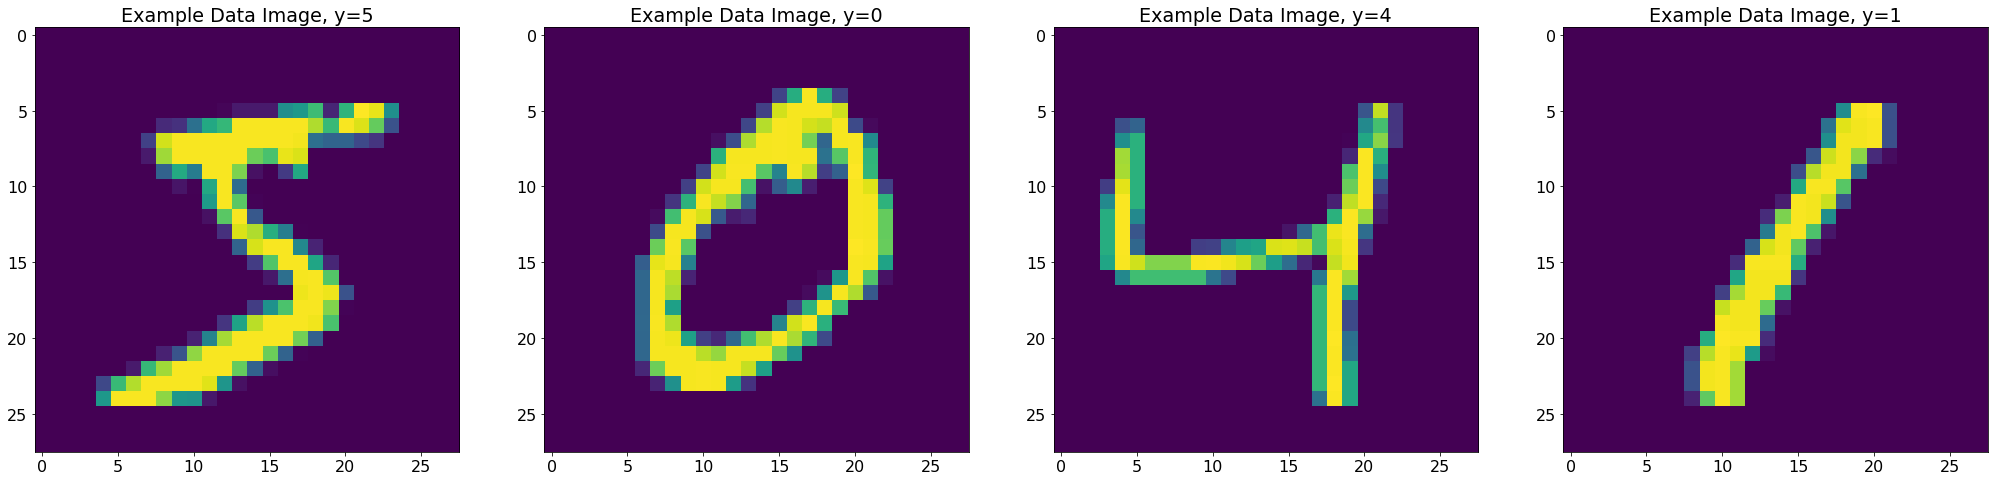

In [4]:
# Visualise data
plt.rcParams.update({'font.size': 16})
fig, axes = plt.subplots(1,4, figsize=(35,35))
imx, imy = (28,28)
labels   = [0,1,2,3]
for i, ax in enumerate(axes):
    visual = np.reshape(x_train[labels[i]], (imx,imy))
    ax.set_title("Example Data Image, y="+str(int(y_train[labels[i]])))
    ax.imshow(visual, vmin=0, vmax=1)
plt.show()

## Models

In [5]:
class DeepVIB(nn.Module):
    def __init__(self, input_shape, output_shape, z_dim):
        """
        Deep VIB Model.
        
        Arguments:
        ----------
        input_shape : `int`
            Flattened size of image. (Default=784)
        output_shape : `int`
            Number of classes. (Default=10)            
        z_dim : `int`
            The dimension of the latent variable z. (Default=256)
        """        
        super(DeepVIB, self).__init__()
        self.input_shape  = input_shape
        self.output_shape = output_shape
        self.z_dim  = z_dim
        
        # build encoder
        self.encoder = nn.Sequential(nn.Linear(input_shape, 1024),
                                     nn.ReLU(inplace=True),
                                     nn.Linear(1024, 1024),
                                     nn.ReLU(inplace=True)                                    )  
        self.fc_mu  = nn.Linear(1024, self.z_dim) 
        self.fc_std = nn.Linear(1024, self.z_dim)
        
        # build decoder
        self.decoder = nn.Linear(self.z_dim, output_shape)

    def encode(self, x):
        """
        x : [batch_size,784]
        """
        x = self.encoder(x)
        return self.fc_mu(x), F.softplus(self.fc_std(x)-5, beta=1)
    
    def decode(self, z):
        """
        z : [batch_size,z_dim]
        """ 
        return self.decoder(z)
    
    def reparameterise(self, mu, std):
        """
        mu : [batch_size,z_dim]
        std : [batch_size,z_dim]        
        """        
        # get epsilon from standard normal
        eps = torch.randn_like(std)
        return mu + std*eps
    
    def forward(self, x):
        """
        Forward pass 
        
        Parameters:
        -----------
        x : [batch_size,28,28]
        """
        # flattent image
        x_flat = x.view(x.size(0), -1)
        mu, std = self.encode(x_flat)
        z = self.reparameterise(mu, std)
        return self.decode(z), mu, std     

## Training

In [6]:
# Hyperparameters
beta   = 1e-3
z_dim  = 256
epochs = 200
batch_size = 128
learning_rate = 1e-4
decay_rate = 0.97

In [7]:
# Create DatatLoader 
train_dataset    = data_utils.TensorDataset(x_train, y_train)
train_dataloader = torch.utils.data.DataLoader(train_dataset,
                                               batch_size=batch_size,
                                               shuffle=True)

# Loss function: Cross Entropy Loss (CE) + beta*KL divergence
def loss_function(y_pred, y, mu, std):
    """    
    y_pred : [batch_size,10]
    y : [batch_size,10]    
    mu : [batch_size,z_dim]  
    std: [batch_size,z_dim] 
    """   
    CE = F.cross_entropy(y_pred, y, reduction='sum')
    KL = 0.5 * torch.sum(mu.pow(2) + std.pow(2) - 2*std.log() - 1)
    return (beta*KL + CE) / y.size(0)

# Initialize Deep VIB
vib = DeepVIB(np.prod(x_train[0].shape), n_classes, z_dim)

# Optimiser
optimiser = torch.optim.Adam(vib.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimiser, gamma=decay_rate)

# Send to GPU if available
vib.to(device)

print("Device: ", device)
print(vib)

Device:  cuda
DeepVIB(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU(inplace=True)
  )
  (fc_mu): Linear(in_features=1024, out_features=256, bias=True)
  (fc_std): Linear(in_features=1024, out_features=256, bias=True)
  (decoder): Linear(in_features=256, out_features=10, bias=True)
)


In [8]:
# Training
measures = defaultdict(list)
start_time = time.time()

# put Deep VIB into train mode 
vib.train()  

for epoch in range(epochs):
    epoch_start_time = time.time()  
    
    # exponential decay of learning rate every 2 epochs
    if epoch % 2 == 0 and epoch > 0:
        scheduler.step()    
    
    batch_loss = 0
    batch_accuracy = 0
    for _, (X,y) in enumerate(train_dataloader): 
        X = X.to(device)        
        y = y.long().to(device)
        
        # Zero accumulated gradients
        vib.zero_grad()
        
        # forward pass through Deep VIB
        y_pred, mu, std = vib(X)
        
        # Calculate loss
        loss = loss_function(y_pred, y, mu, std)
        # Backpropogation: calculating gradients
        loss.backward()
        # Update parameters of generator
        optimiser.step()  
        
        # Save loss per batch
        batch_loss += loss.item()*X.size(0) 
        # Save accuracy per batch
        y_pred = torch.argmax(y_pred,dim=1)
        batch_accuracy += int(torch.sum(y == y_pred))        
           
    # Save losses per epoch
    measures['total_loss'].append(batch_loss / len(train_dataloader.dataset))        
    # Save accuracy per epoch
    measures['accuracy'].append(batch_accuracy / len(train_dataloader.dataset))            
    
    print("Epoch: {}/{}...".format(epoch+1, epochs),
          "Loss: {:.4f}...".format(measures['total_loss'][-1]),
          "Accuracy: {:.4f}...".format(measures['accuracy'][-1]),
          "Time Taken: {:,.4f} seconds".format(time.time()-epoch_start_time))
    
print("Total Time Taken: {:,.4f} seconds".format(time.time()-start_time))

Epoch: 1/200... Loss: 0.8247... Accuracy: 0.8544... Time Taken: 2.9338 seconds
Epoch: 2/200... Loss: 0.3168... Accuracy: 0.9435... Time Taken: 2.6235 seconds
Epoch: 3/200... Loss: 0.2235... Accuracy: 0.9614... Time Taken: 3.1089 seconds
Epoch: 4/200... Loss: 0.1736... Accuracy: 0.9713... Time Taken: 2.7176 seconds
Epoch: 5/200... Loss: 0.1419... Accuracy: 0.9778... Time Taken: 2.8584 seconds
Epoch: 6/200... Loss: 0.1211... Accuracy: 0.9825... Time Taken: 2.6173 seconds
Epoch: 7/200... Loss: 0.1039... Accuracy: 0.9865... Time Taken: 2.6863 seconds
Epoch: 8/200... Loss: 0.0908... Accuracy: 0.9896... Time Taken: 2.6867 seconds
Epoch: 9/200... Loss: 0.0811... Accuracy: 0.9913... Time Taken: 2.6113 seconds
Epoch: 10/200... Loss: 0.0731... Accuracy: 0.9932... Time Taken: 3.1410 seconds
Epoch: 11/200... Loss: 0.0650... Accuracy: 0.9948... Time Taken: 2.7592 seconds
Epoch: 12/200... Loss: 0.0604... Accuracy: 0.9954... Time Taken: 2.6326 seconds
Epoch: 13/200... Loss: 0.0557... Accuracy: 0.9961

Epoch: 104/200... Loss: 0.0190... Accuracy: 0.9996... Time Taken: 2.6361 seconds
Epoch: 105/200... Loss: 0.0189... Accuracy: 0.9996... Time Taken: 2.6597 seconds
Epoch: 106/200... Loss: 0.0192... Accuracy: 0.9994... Time Taken: 2.6189 seconds
Epoch: 107/200... Loss: 0.0192... Accuracy: 0.9996... Time Taken: 3.0845 seconds
Epoch: 108/200... Loss: 0.0190... Accuracy: 0.9996... Time Taken: 2.6658 seconds
Epoch: 109/200... Loss: 0.0190... Accuracy: 0.9996... Time Taken: 2.5523 seconds
Epoch: 110/200... Loss: 0.0187... Accuracy: 0.9998... Time Taken: 2.9323 seconds
Epoch: 111/200... Loss: 0.0189... Accuracy: 0.9996... Time Taken: 2.8170 seconds
Epoch: 112/200... Loss: 0.0188... Accuracy: 0.9996... Time Taken: 2.5783 seconds
Epoch: 113/200... Loss: 0.0191... Accuracy: 0.9995... Time Taken: 3.3629 seconds
Epoch: 114/200... Loss: 0.0191... Accuracy: 0.9995... Time Taken: 2.6130 seconds
Epoch: 115/200... Loss: 0.0189... Accuracy: 0.9996... Time Taken: 2.6526 seconds
Epoch: 116/200... Loss: 0.01

## Testing

In [9]:
# Create DatatLoader 
test_dataset = data_utils.TensorDataset(x_test, y_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset,
                                              batch_size=batch_size,
                                              shuffle=True)

measures = defaultdict(int)
start_time = time.time()
    
# put Deep VIB into train mode 
vib.eval()       

with torch.no_grad():
    for _, (X,y) in enumerate(test_dataloader): 
        X = X.to(device)        
        y = y.long().to(device)
        
        # forward pass through Deep VIB
        y_pred, mu, std = vib(X)
    
        y_pred = torch.argmax(y_pred,dim=1)
        measures['accuracy'] += int(torch.sum(y == y_pred))

print("Accuracy: {:.4f}...".format(measures['accuracy']/len(test_dataloader.dataset)),
      "Time Taken: {:,.4f} seconds".format(time.time()-start_time))        

Accuracy: 0.9824... Time Taken: 0.1271 seconds
